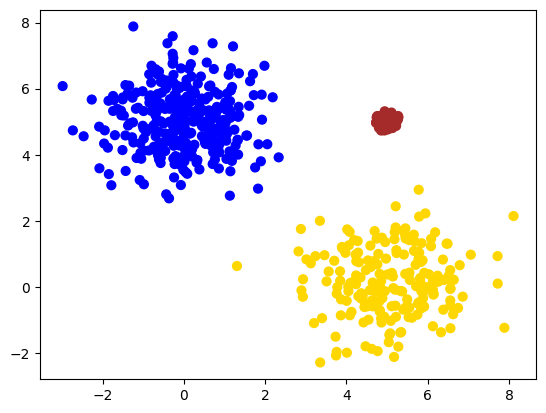

In [268]:
import numpy as np
import matplotlib.pyplot as plt 

ncells = 1000  # Number of cells


xmus = [0, 5, 5]
xsds = [1, 0.1, 1]
ymus = [5, 5, 0]
ysds = [1, 0.1, 1]

prop1 = [0.3, 0.5, 0.2]
comp1 = np.random.choice([1, 2, 3], p=prop1, size=ncells, replace=True)
ref_cols = ["blue", "brown", "gold"]
clust1 = np.array([ref_cols[i-1] for i in comp1])

samples1 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp1-1], scale=np.array(xsds)[comp1-1], size=ncells),
                            np.random.normal(loc=np.array(ymus)[comp1-1], scale=np.array(ysds)[comp1-1], size=ncells)))
ngenes = 100
np.random.seed(0)
proj = np.random.normal(size=(ngenes, 2))

X1 = np.dot(samples1, proj.T)

plt.scatter(samples1[:, 0], samples1[:, 1], marker='o', s=40, c=clust1)

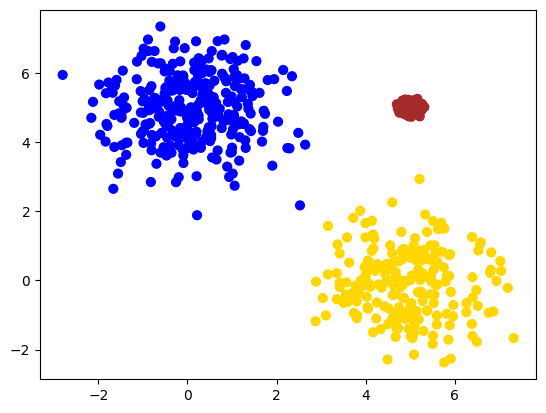

In [269]:
import numpy as np
import matplotlib.pyplot as plt 

ncells = 1000  # Number of cells


xmus = [0, 5, 5]
xsds = [1, 0.1, 1]
ymus = [5, 5, 0]
ysds = [1, 0.1, 1]

prop2 = [0.3, 0.5, 0.2]
comp2 = np.random.choice([1, 2, 3], p=prop2, size=ncells, replace=True)
ref_cols = ["blue", "brown", "gold"]
clust2 = np.array([ref_cols[i-1] for i in comp2])


samples2 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp2-1], scale=np.array(xsds)[comp2-1], size=ncells),
                            np.random.normal(loc=np.array(ymus)[comp2-1], scale=np.array(ysds)[comp2-1], size=ncells)))
ngenes = 100

proj = np.random.normal(size=(ngenes, 2))

X2 = np.dot(samples2, proj.T)

plt.scatter(samples2[:, 0], samples2[:, 1], marker='o', s=40, c=clust2)

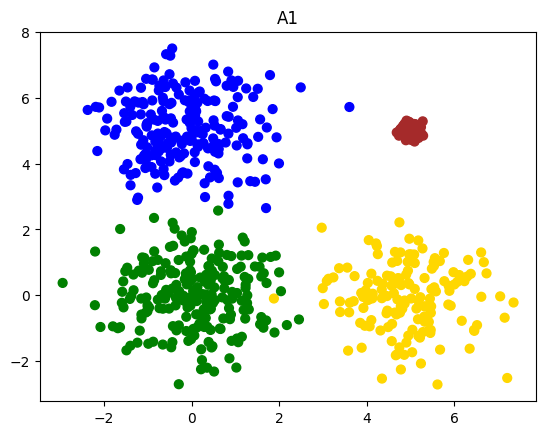

In [125]:
xmus = [0, 5, 5, 0]
xsds = [1, 0.1, 1, 1]
ymus = [5, 5, 0, 0]
ysds = [1, 0.1, 1, 1]


prop2 = [0.20, 0.40, 0.15, 0.25]

# Setting proportions of each of the three cell types in batch 2.
comp2 = np.random.choice([1, 2, 3, 4], p=prop2, size=ncells, replace=True)
samples2 = np.column_stack((np.random.normal(loc=np.array(xmus)[comp2-1], scale=np.array(xsds)[comp2-1], size=ncells),
                            np.random.normal(loc=np.array(ymus)[comp2-1], scale=np.array(ysds)[comp2-1], size=ncells)))
ref_cols = ["blue", "brown", "gold", 'green']
clust2 = [ref_cols[i-1] for i in comp2]

plt.scatter(samples2[:, 0], samples2[:, 1], marker='o', s=40, c=clust2)

plt.title('A1')
plt.show()

X2 = np.dot(samples2, proj.T)

#A2 = np.transpose(A2)
row_names = [f"Cell{i+1}-1" for i in range(ncells)]
col_names = [f"Gene{i+1}" for i in range(ngenes)]


In [270]:
import numpy
def total_correlation(X1, X2, k):
    r1 = 1e-10
    r2 = 1e-10

    n1 = X1.shape[1] 
    n2 = X2.shape[1]
    m = X1.shape[0] #number of rows

    mean1 = numpy.mean(X1, axis=0)
    mean2 = numpy.mean(X2, axis=0)

    H1bar = X1 - numpy.tile(mean1, (m, 1))
    H2bar = X2 - numpy.tile(mean2, (m, 1))


    SigmaHat12 = (1.0 / (m - 1)) * numpy.dot(H1bar.T, H2bar)
    SigmaHat11 = (1.0 / (m - 1)) * numpy.dot(H1bar.T, H1bar) + r1 * numpy.identity(n1)
    SigmaHat22 = (1.0 / (m - 1)) * numpy.dot(H2bar.T, H2bar) + r2 * numpy.identity(n2)


    [D1, V1] = numpy.linalg.eigh(SigmaHat11) #Eigendecomposition for easy inversion
    [D2, V2] = numpy.linalg.eigh(SigmaHat22) #Eigendecomposition for easy inversion
    SigmaHat11RootInv = numpy.dot(numpy.dot(V1, numpy.diag(D1 ** -0.5)), V1.T) #
    SigmaHat22RootInv = numpy.dot(numpy.dot(V2, numpy.diag(D2 ** -0.5)), V2.T)
    T = numpy.dot(numpy.dot(SigmaHat11RootInv, SigmaHat12), SigmaHat22RootInv)
    

    [U, D, V] = numpy.linalg.svd(T)
    V = V.T
    A1star = numpy.dot(SigmaHat11RootInv, U[:, 0:k])
    A2star = numpy.dot(SigmaHat22RootInv, V[:, 0:k])
    D = D[0:k]

    top_k_singular_values = D[:k]

    total_corr = numpy.sum(D)

    return A1star, total_corr, A2star

0.05863570482014291


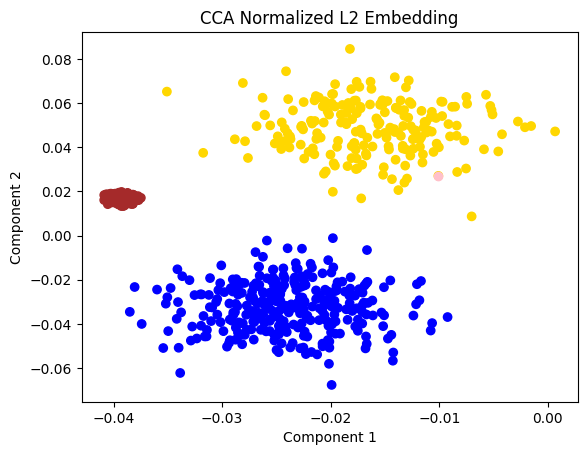

In [271]:
A1, total_corr, A2 = total_correlation(X1, X2, k=2)
print(total_corr)

view_1 = normalize(X1 @ A1, norm='l2', axis=0)
view_2 = normalize(X2 @ A2, norm='l2', axis=0)
target_cell_index = 11
#X_embedded = TSNE(n_components=2).fi|t_transform((X1 @ A1))
plt.scatter(view_1[:,0], view_1[:,1], c=clust1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.scatter(view_1[target_cell_index, 0], view_1[target_cell_index, 1], c='pink', marker='o', label='Target Cell')

plt.title('CCA Normalized L2 Embedding')
plt.show()

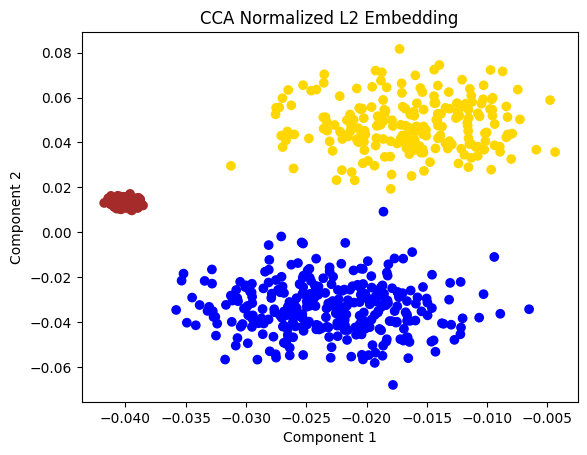

In [272]:
#X_embedded = TSNE(n_components=2).fit_transform((X1 @ A1))
plt.scatter(view_2[:,0], view_2[:,1], c=clust2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.title('CCA Normalized L2 Embedding')
plt.show()

In [273]:

view_1[30, 0], view_1[30, 1]

(-0.020034788195721256, -0.02638423414087515)

[113 450 690 895 952 612 395 735 462 215 916 725 768 753 996 363 852 314
  74  52]


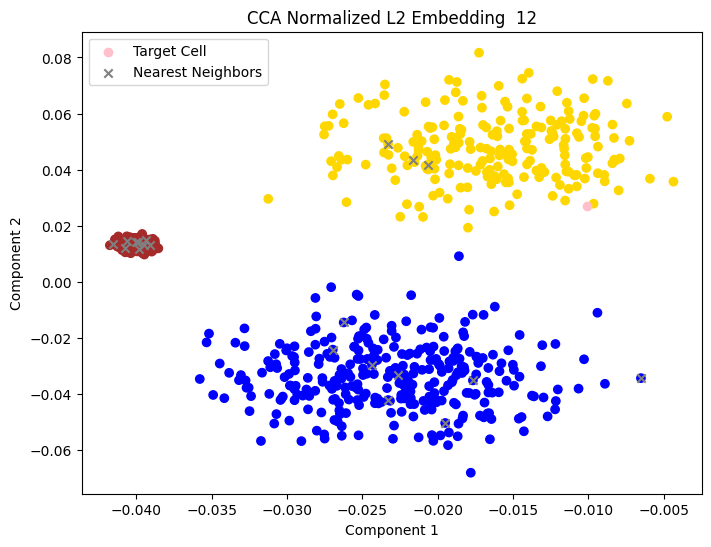

In [274]:
k_neighbors = 20
knn = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
knn.fit(view_1)
distances, indices = knn.kneighbors(view_2)

# Przykładowe rysowanie scatter plot
plt.figure(figsize=(8, 6))

# W tym przykładzie, wyświetlimy tylko K najbliższych sąsiadów dla pierwszej komórki.
# Możesz dostosować to do swoich potrzeb i narysować dla innych komórek.
target_cell_index = 11
neighbors_indices = indices[target_cell_index]
print(neighbors_indices)

# Legenda i etykiety osi


plt.scatter(view_2[:,0], view_2[:,1], c=clust2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.title(f'CCA Normalized L2 Embedding  {target_cell_index+1}')

# Rysowanie komórki docelowej (punkt centralny na scatter plot)
plt.scatter(view_1[target_cell_index, 0], view_1[target_cell_index, 1], c='pink', marker='o', label='Target Cell')

# Rysowanie K najbliższych sąsiadów
plt.scatter(view_2[neighbors_indices, 0], view_2[neighbors_indices, 1], c='gray', marker='x', label='Nearest Neighbors')

# Podpisujemy punkty na wykresie
#for i in range(k_neighbors):
#    plt.annotate(f'Neighbor {i+1}', (view_2[neighbors_indices[i], 0], view_2[neighbors_indices[i], 1]), 
#                 textcoords="offset points", xytext=(10,-10), ha='center')

plt.legend()

plt.show()

In [275]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
reduced_ccv
# Załóżmy, że masz macierz CCV o wymiarach (liczba_komorek, liczba_cech)
# Przykład macierzy CCV (do zastąpienia rzeczywistymi danymi):
ccv_matrix = np.random.rand(100, 50)

# Krok 1: Redukcja wymiarów za pomocą PCA
# Wybierz docelową liczbę komponentów PCA, zakładam tutaj, że 10 jest odpowiednim wyborem.
num_components = 10
pca = PCA(n_components=num_components)
reduced_ccv = pca.fit_transform(ccv_matrix)

# Krok 2: Normalizacja L2
normalized_ccv = normalize(reduced_ccv, norm='l2')

# Krok 3: Znalezienie K najbliższych sąsiadów (KNN) na podstawie L2-znormalizowanego CCV
k_neighbors = 5  # Możesz dostosować wartość K do swoich potrzeb.
knn = NearestNeighbors(n_neighbors=k_neighbors, metric='euclidean')
knn.fit(normalized_ccv)
distances, indices = knn.kneighbors(normalized_ccv)

# distances zawiera odległości od KNN, a indices zawiera indeksy K najbliższych sąsiadów dla każdej komórki.

# Teraz możesz użyć 'distances' i 'indices' do analizy dalszych danych lub zastosować je w inny sposób w zależności od twoich potrzeb.

# Przykładowe wydrukowanie wyników dla pierwszej komórki:
print("Odległości od KNN dla pierwszej komórki:")
print(distances[0])
print("Indeksy KNN dla pierwszej komórki:")
print(indices[0])


Odległości od KNN dla pierwszej komórki:
[0.         0.88243858 0.90902607 0.9982599  1.02911024]
Indeksy KNN dla pierwszej komórki:
[ 0 39 61 93 45]


In [276]:
reduced_ccv.shape

(100, 10)

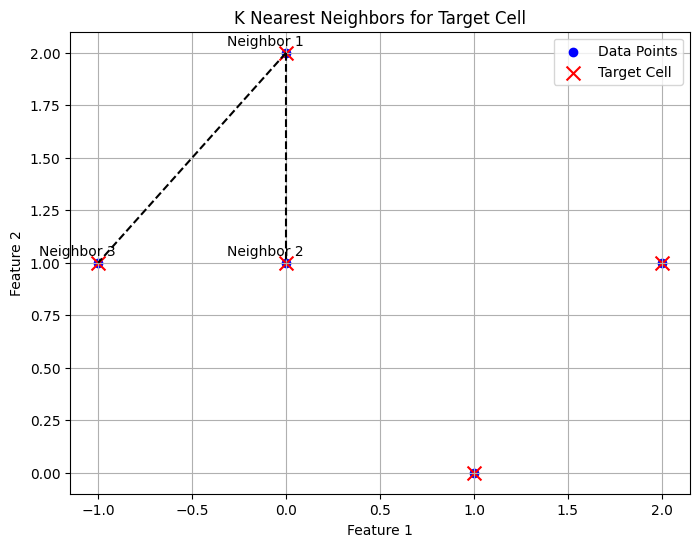

In [277]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Przykładowe dane
samples = [[0, 2], [1, 0], [0, 1], [-1, 1], [2, 1]]
target_cell = samples

# Tworzenie modelu KNN
neigh = NearestNeighbors(n_neighbors=1, radius=0.4)
neigh.fit(samples)

# Znalezienie indeksów dwóch najbliższych sąsiadów
k_neighbors_indices = neigh.kneighbors(target_cell, 3, return_distance=False)

# Przygotowanie danych do wizualizacji
samples = np.array(samples)
target_cell = np.array(target_cell)

# Rysowanie wykresu
plt.figure(figsize=(8, 6))

# Rysowanie wszystkich punktów danych
plt.scatter(samples[:, 0], samples[:, 1], color='blue', marker='o', label='Data Points')

# Rysowanie komórki docelowej
plt.scatter(target_cell[:, 0], target_cell[:, 1], color='red', marker='x', s=100, label='Target Cell')

ii = 0

# Rysowanie linii łączących komórkę docelową z jej najbliższymi sąsiadami
for neighbor_index in k_neighbors_indices[ii]:
    plt.plot([target_cell[0, 0], samples[neighbor_index, 0]], [target_cell[0, 1], samples[neighbor_index, 1]], 'k--')

# Dodawanie etykiet dla najbliższych sąsiadów
for i, neighbor_index in enumerate(k_neighbors_indices[ii]):
    plt.annotate(f'Neighbor {i+1}', (samples[neighbor_index, 0], samples[neighbor_index, 1]),
                 textcoords="offset points", xytext=(-15, 5), ha='center')

# Etykiety osi i tytuł wykresu
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K Nearest Neighbors for Target Cell')

plt.legend()
plt.grid(True)
plt.show()


In [293]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def mutual_nearest_neighbors(data_batch1, data_batch2, k=3):
    knn_batch1 = NearestNeighbors(n_neighbors=k+1)  # +1 to include each cell as its own neighbor
    knn_batch2 = NearestNeighbors(n_neighbors=k+1)

    # Match KNN models with data from both batches
    knn_batch1.fit(data_batch1)
    knn_batch2.fit(data_batch2)

    # Find the nearest neighbors for each cell in both batches
    _, indices_batch1 = knn_batch1.kneighbors(data_batch1)
    _, indices_batch2 = knn_batch2.kneighbors(data_batch2)
    print(indices_batch1)
    # Find the mutual nearest neighbor for each cell
    mutual_neighbors_batch1 = []
    mutual_neighbors_batch2 = []

    for i in range(len(data_batch1)):
        idx_in_batch1 = indices_batch1[i, 1:]  # we ommit the index, for the same cell 
        idx_in_batch2 = indices_batch2[idx_in_batch1, 1:]

        if i in idx_in_batch2:
            mutual_neighbors_batch1.append(i)
            mutual_neighbors_batch2.append(i)

    # Z
    return np.array(mutual_neighbors_batch1), np.array(mutual_neighbors_batch2)


mutual_neighbors_batch1, mutual_neighbors_batch2 = mutual_nearest_neighbors(view_1, view_2, k = 20)



[[0 2 3]
 [1 2 4]
 [2 0 3]
 [3 2 0]
 [4 1 2]]


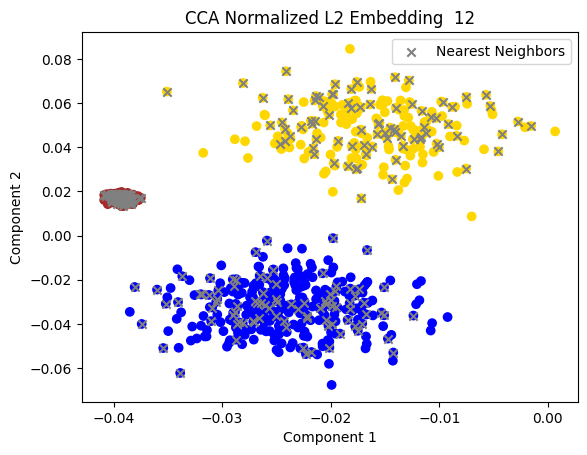

In [291]:
plt.scatter(view_1[:,0], view_1[:,1], c=clust1)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.title(f'CCA Normalized L2 Embedding  {target_cell_index+1}')

# Rysowanie K najbliższych sąsiadów
plt.scatter(view_1[mutual_neighbors_batch1, 0], view_1[mutual_neighbors_batch1, 1], c='gray', marker='x', label='Nearest Neighbors')


plt.legend()

plt.show()

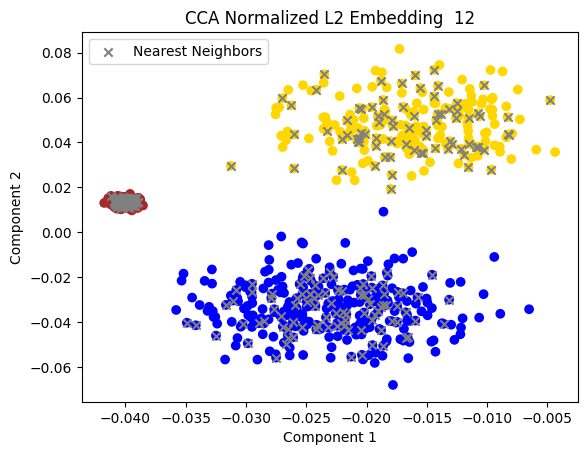

In [290]:
plt.scatter(view_2[:,0], view_2[:,1], c=clust2)
plt.xlabel('Component 1')
plt.ylabel('Component 2')


plt.title(f'CCA Normalized L2 Embedding  {target_cell_index+1}')

# Rysowanie K najbliższych sąsiadów
plt.scatter(view_2[mutual_neighbors_batch2, 0], view_2[mutual_neighbors_batch2, 1], c='gray', marker='x', label='Nearest Neighbors')


plt.legend()

plt.show()